<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/3_2_Feature_Engineering_Dimension_Reduction_%D0%9A%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D0%B8%D1%80%D1%83%D0%B5%D0%BC%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_(Supervised_Methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Feature Engineering. Снижение размерности (Dimension Reduction)
### Оглавление

### 1. **Снижение размерности (Dimension Reduction)**  
#### 1.1 **Неконтролируемые методы (Unsupervised Methods)**  
   - 1.1.1 Метод главных компонент (PCA, Principal Components Analysis)  
   - 1.1.2 Ядерный метод главных компонент (Kernel PCA, Kernel Principal Components Analysis)  
   - 1.1.3 t-SNE (t-Distributed Stochastic Neighbor Embedding)  
   - 1.1.4 UMAP (Uniform Manifold Approximation and Projection)  
   - 1.1.5 Метод независимых компонент (ICA, Independent Component Analysis)  
   - 1.1.6 Неотрицательная матричная факторизация (NMF, Non-Negative Matrix Factorization)  
   - 1.1.7 Автоэнкодеры (Autoencoders, Neural Network-Based Dimensionality Reduction)  
   - 1.1.8 Изометрическое отображение (Isomap, Isometric Mapping)  
   - 1.1.9 Локально линейное вложение (LLE, Locally Linear Embedding)  
   - 1.1.10 Собственные отображения Лапласа (Laplacian Eigenmaps)  

#### 1.2 **Контролируемые методы (Supervised Methods)**  
   - 1.2.1 Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis)  
   - 1.2.2 Квадратичный дискриминантный анализ (QDA, Quadratic Discriminant Analysis)  
   - 1.2.3 Метод частичных наименьших квадратов (PLS, Partial Least Squares)  
   - 1.2.4 Обобщенный дискриминантный анализ (GDA, Generalized Discriminant Analysis)  
   - 1.2.5 Канонический корреляционный анализ (CCA, Canonical Correlation Analysis)  
   - 1.2.6 Контролируемый метод главных компонент (Supervised PCA, Supervised Principal Components Analysis)  
   - 1.2.7 Дискриминантный анализ Фишера (FDA, Fisher Discriminant Analysis)  


# 1.2 **Контролируемые методы (Supervised Methods)**

Контролируемые методы (Supervised Methods) — это один из основных подходов в машинном обучении, где модель обучается на размеченных данных, то есть на данных, для которых известны правильные ответы (метки классов или целевые значения). Цель контролируемого обучения — построить модель, которая сможет предсказывать метки для новых, ранее не встречавшихся данных. Эти методы широко применяются в задачах классификации (когда нужно отнести объект к одному из классов) и регрессии (когда нужно предсказать числовое значение).




##1.2.1 Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis)



#### Введение

Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis) — это один из ключевых методов машинного обучения, который используется для снижения размерности данных и классификации. Основная цель LDA — найти такие линейные комбинации признаков, которые наилучшим образом разделяют классы. В отличие от метода главных компонент (PCA), который максимизирует общую дисперсию данных, LDA фокусируется на максимизации разделимости классов.

LDA широко применяется в задачах распознавания образов, анализа данных, биоинформатики и других областях, где важно учитывать информацию о классах. В этой лекции мы подробно разберём математические основы LDA, его алгоритм, а также обсудим его преимущества и ограничения.



#### Основные понятия и постановка задачи

1. **Данные и классы**:
   Предположим, у нас есть набор данных $X = \{x_1, x_2, \dots, x_n\}$, где каждый объект $x_i$ — это вектор признаков размерности $D$. Каждый объект принадлежит одному из $K$ классов. Обозначим классы как $C_1, C_2, \dots, C_K$.

2. **Цель LDA**:
   LDA стремится найти такое направление (или набор направлений) в пространстве признаков, при котором проекции объектов разных классов максимально разделены, а проекции объектов одного класса максимально сгруппированы. Это достигается за счёт максимизации отношения межклассовой дисперсии к внутриклассовой дисперсии.

3. **Математическая формулировка**:
   Формально задача LDA заключается в нахождении вектора $w$, который максимизирует критерий Фишера:

$$
   J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

   где:
   - $S_B$ — межклассовая матрица рассеяния (between-class scatter matrix).
   - $S_W$ — внутриклассовая матрица рассеяния (within-class scatter matrix).



#### Матрицы рассеяния

1. **Внутриклассовая матрица рассеяния $S_W$**:
   Эта матрица описывает разброс объектов внутри каждого класса. Она вычисляется как сумма ковариационных матриц каждого класса:

$$
   S_W = \sum_{k=1}^K \sum_{x_i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^T
$$

   где:
   - $C_k$ — множество объектов, принадлежащих классу $k$.
   - $\mu_k$ — среднее значение объектов класса $k$:
  $$
     \mu_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i
  $$
     где $N_k$ — количество объектов в классе $k$.

2. **Межклассовая матрица рассеяния $S_B$**:
   Эта матрица описывает разброс между средними значениями разных классов. Она вычисляется как:

$$
   S_B = \sum_{k=1}^K N_k (\mu_k - \mu)(\mu_k - \mu)^T
$$

   где:
   - $N_k$ — количество объектов в классе $k$.
   - $\mu$ — общее среднее значение всех объектов:
  $$
     \mu = \frac{1}{N} \sum_{i=1}^N x_i
  $$
     где $N$ — общее количество объектов.



#### Максимизация критерия Фишера

Критерий Фишера $J(w)$ определяется как отношение межклассовой дисперсии к внутриклассовой дисперсии:

$$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

Наша цель — найти такой вектор $w$, который максимизирует это отношение. Для этого необходимо решить задачу оптимизации:

$$
\max_w J(w) = \max_w \frac{w^T S_B w}{w^T S_W w}
$$



#### Решение задачи оптимизации

1. **Градиентный подход**:
   Чтобы найти максимум $J(w)$, воспользуемся методом множителей Лагранжа. Введём ограничение $w^T S_W w = 1$, чтобы упростить задачу. Тогда задача оптимизации примет вид:

$$
   \max_w w^T S_B w \quad \text{при условии} \quad w^T S_W w = 1
$$

2. **Функция Лагранжа**:
   Составим функцию Лагранжа:

$$
   \mathcal{L}(w, \lambda) = w^T S_B w - \lambda (w^T S_W w - 1)
$$

   где $\lambda$ — множитель Лагранжа.

3. **Дифференцирование по $w$**:
   Продифференцируем функцию Лагранжа по $w$ и приравняем производную к нулю:

$$
   \frac{\partial \mathcal{L}}{\partial w} = 2 S_B w - 2 \lambda S_W w = 0
$$

   Упростив, получим:

$$
   S_B w = \lambda S_W w
$$

   Это уравнение известно как обобщённая задача на собственные значения.

4. **Решение обобщённой задачи на собственные значения**:
   Чтобы найти $w$, необходимо решить уравнение:

$$
   S_W^{-1} S_B w = \lambda w
$$

   Здесь $S_W^{-1} S_B$ — матрица, а $\lambda$ — её собственное значение, соответствующее собственному вектору $w$.

5. **Интерпретация собственных значений и векторов**:
   - Собственные значения $\lambda$ показывают, насколько хорошо соответствующие собственные векторы $w$ разделяют классы.
   - Собственные векторы $w$ определяют направления в пространстве признаков, вдоль которых классы максимально разделены.



#### Выбор оптимальных направлений

1. **Ранг матрицы $S_B$**:
   Матрица $S_B$ имеет ранг не более $K-1$, где $K$ — количество классов. Это означает, что существует не более $K-1$ независимых направлений, которые можно использовать для разделения классов.

2. **Собственные векторы**:
   Для нахождения оптимальных направлений выбираются собственные векторы, соответствующие наибольшим собственным значениям. Эти векторы образуют матрицу проекции $W$:

$$
   W = [w_1, w_2, \dots, w_{K-1}]
$$

   где $w_1, w_2, \dots, w_{K-1}$ — собственные векторы, упорядоченные по убыванию собственных значений.

3. **Проекция данных**:
   Данные проецируются на новое пространство с помощью матрицы $W$:

$$
   y_i = W^T x_i
$$

   где $y_i$ — проекция объекта $x_i$ на новое пространство размерности $K-1$.



#### Геометрическая интерпретация

1. **Внутриклассовая дисперсия**:
   Внутриклассовая дисперсия $w^T S_W w$ характеризует разброс объектов внутри каждого класса после проекции на направление $w$. Чем меньше это значение, тем более компактно расположены объекты одного класса.

2. **Межклассовая дисперсия**:
   Межклассовая дисперсия $w^T S_B w$ характеризует расстояние между средними значениями разных классов после проекции на направление $w$. Чем больше это значение, тем дальше друг от друга находятся классы.

3. **Максимизация отношения**:
   Максимизация отношения $\frac{w^T S_B w}{w^T S_W w}$ означает поиск такого направления $w$, при котором классы максимально удалены друг от друга, а объекты внутри каждого класса максимально сгруппированы.



#### Преимущества и ограничения LDA

1. **Преимущества**:
   - LDA эффективно снижает размерность данных, сохраняя информацию о разделимости классов.
   - Метод устойчив к переобучению, особенно при небольшом количестве обучающих данных.
   - LDA может быть использован как для классификации, так и для визуализации данных.

2. **Ограничения**:
   - LDA предполагает, что данные каждого класса имеют нормальное распределение.
   - Классы должны иметь одинаковую ковариационную матрицу.
   - LDA может быть неэффективен, если классы сильно перекрываются в исходном пространстве.



Линейный дискриминантный анализ (LDA) — это мощный метод, который позволяет эффективно снижать размерность данных, сохраняя информацию о разделимости классов. Основная идея LDA заключается в максимизации отношения межклассовой дисперсии к внутриклассовой дисперсии, что достигается через решение обобщённой задачи на собственные значения.

Метод имеет свои ограничения, такие как предположение о нормальности распределения данных и равенстве ковариационных матриц классов. Однако при выполнении этих условий LDA демонстрирует высокую эффективность в задачах классификации и визуализации данных.

Таким образом, LDA является важным инструментом в машинном обучении, который позволяет не только снижать размерность данных, но и улучшать качество классификации за счёт учёта информации о классах.




Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что первые две точки принадлежат классу $C_1$, а последние две — классу $C_2$. Наша цель — применить линейный дискриминантный анализ (LDA) для нахождения направления, которое наилучшим образом разделяет эти два класса.



#### Шаг 1: Вычисление средних значений классов

1. **Среднее значение класса $C_1$**:
$$
   \mu_1 = \frac{1}{2} \left( \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} \right) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix}
$$

2. **Среднее значение класса $C_2$**:
$$
   \mu_2 = \frac{1}{2} \left( \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} + \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} \right) = \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix}
$$

3. **Общее среднее значение $\mu$**:
$$
   \mu = \frac{1}{4} \left( \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} + \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} + \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} \right) = \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix}
$$



#### Шаг 2: Вычисление внутриклассовой матрицы рассеяния $S_W$

Внутриклассовая матрица рассеяния $S_W$ вычисляется как сумма ковариационных матриц каждого класса.

1. **Для класса $C_1$**:
$$
   S_{W1} = \sum_{x_i \in C_1} (x_i - \mu_1)(x_i - \mu_1)^T
$$
   Вычислим для каждой точки:
$$
   (x_1 - \mu_1) = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix}
$$
$$
   (x_1 - \mu_1)(x_1 - \mu_1)^T = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix} \begin{bmatrix} -1.5 & -1.5 & -1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
$$
   Аналогично для $x_2$:
$$
   (x_2 - \mu_1) = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix}
$$
$$
   (x_2 - \mu_1)(x_2 - \mu_1)^T = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix} \begin{bmatrix} 1.5 & 1.5 & 1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
$$
   Суммируем:
$$
   S_{W1} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix}
$$

2. **Для класса $C_2$**:
   Аналогично вычисляем $S_{W2}$:
$$
   S_{W2} = \sum_{x_i \in C_2} (x_i - \mu_2)(x_i - \mu_2)^T
$$
   Вычисления аналогичны классу $C_1$, и в результате получим:
$$
   S_{W2} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix}
$$

3. **Итоговая внутриклассовая матрица рассеяния $S_W$**:
$$
   S_W = S_{W1} + S_{W2} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix} + \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$



#### Шаг 3: Вычисление межклассовой матрицы рассеяния $S_B$

Межклассовая матрица рассеяния $S_B$ вычисляется как:

$$
S_B = \sum_{k=1}^K N_k (\mu_k - \mu)(\mu_k - \mu)^T
$$

1. **Для класса $C_1$**:
$$
   (\mu_1 - \mu) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} - \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix}
$$
$$
   (\mu_1 - \mu)(\mu_1 - \mu)^T = \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix} \begin{bmatrix} -3 & -3 & -3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$
   Учитывая $N_1 = 2$:
$$
   N_1 (\mu_1 - \mu)(\mu_1 - \mu)^T = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix}
$$

2. **Для класса $C_2$**:
$$
   (\mu_2 - \mu) = \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix} - \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix}
$$
$$
   (\mu_2 - \mu)(\mu_2 - \mu)^T = \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix} \begin{bmatrix} 3 & 3 & 3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$
   Учитывая $N_2 = 2$:
$$
   N_2 (\mu_2 - \mu)(\mu_2 - \mu)^T = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix}
$$

3. **Итоговая межклассовая матрица рассеяния $S_B$**:
$$
   S_B = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix} + \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix} = \begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix}
$$

### Шаг 4: Решение обобщённой задачи на собственные значения

Теперь мы переходим к ключевому этапу линейного дискриминантного анализа (LDA) — решению обобщённой задачи на собственные значения. Наша цель — найти вектор $w$, который максимизирует критерий Фишера:

$$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

Это эквивалентно решению уравнения:

$$
S_W^{-1} S_B w = \lambda w
$$

где:
- $S_W$ — внутриклассовая матрица рассеяния.
- $S_B$ — межклассовая матрица рассеяния.
- $\lambda$ — собственное значение, соответствующее собственному вектору $w$.



#### Подробное решение

1. **Проверка обратимости матрицы $S_W$**:
   Прежде чем решать уравнение, необходимо убедиться, что матрица $S_W$ обратима. В нашем примере:

$$
   S_W = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$

   Определитель этой матрицы равен нулю, так как все строки линейно зависимы. Это означает, что $S_W$ — вырожденная матрица, и обратной матрицы $S_W^{-1}$ не существует.

2. **Регуляризация матрицы $S_W$**:
   Чтобы обойти проблему вырожденности, можно добавить небольшое значение $\alpha$ к диагональным элементам матрицы $S_W$. Это называется регуляризацией:

$$
   S_W' = S_W + \alpha I
$$

   где $I$ — единичная матрица, а $\alpha$ — параметр регуляризации (например, $\alpha = 0.01$).

   После регуляризации:

$$
   S_W' = \begin{bmatrix} 9.01 & 9 & 9 \\ 9 & 9.01 & 9 \\ 9 & 9 & 9.01 \end{bmatrix}
$$

   Теперь матрица $S_W'$ обратима.

3. **Вычисление обратной матрицы $S_W'^{-1}$**:
   Обратная матрица $S_W'^{-1}$ вычисляется с использованием стандартных методов линейной алгебры. В данном случае:

$$
   S_W'^{-1} \approx \begin{bmatrix} 111.11 & -111.11 & -111.11 \\ -111.11 & 111.11 & -111.11 \\ -111.11 & -111.11 & 111.11 \end{bmatrix}
$$

   (Значения округлены для упрощения.)

4. **Вычисление матрицы $S_W'^{-1} S_B$**:
   Теперь вычислим матрицу $S_W'^{-1} S_B$:

$$
   S_W'^{-1} S_B = S_W'^{-1} \begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix}
$$

   Умножение даёт:

$$
   S_W'^{-1} S_B \approx \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}
$$

   Это означает, что все собственные значения $\lambda$ равны нулю, что указывает на отсутствие полезных направлений для разделения классов.

5. **Интерпретация результата**:
   В данном примере все собственные значения равны нулю, что говорит о том, что данные не могут быть разделены с помощью LDA. Это связано с тем, что:
   - Все точки в каждом классе идентичны (разброс внутри классов равен нулю).
   - Средние значения классов также не различаются (разброс между классами равен нулю).



#### Общий алгоритм решения обобщённой задачи на собственные значения

Если матрица $S_W$ не вырождена, то решение обобщённой задачи на собственные значения выполняется следующим образом:

1. **Вычисление обратной матрицы $S_W^{-1}$**:
   Если $S_W$ обратима, находим $S_W^{-1}$.

2. **Вычисление матрицы $S_W^{-1} S_B$**:
   Умножаем $S_W^{-1}$ на $S_B$.

3. **Нахождение собственных значений и векторов**:
   Решаем уравнение:

$$
   S_W^{-1} S_B w = \lambda w
$$

   Это стандартная задача на собственные значения, которая решается с использованием численных методов (например, метода QR-разложения).

4. **Выбор собственных векторов**:
   Собственные векторы, соответствующие наибольшим собственным значениям, дают направления, которые наилучшим образом разделяют классы.

5. **Проекция данных**:
   Данные проецируются на новое пространство с использованием выбранных собственных векторов.





Реализуем пример линейного дискриминантного анализа (LDA) на Python. Сначала создадим класс LDA с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация LDA с нуля


In [ ]:
import numpy as np

class LDA:
    def __init__(self, alpha=0.01):
        self.w = None  # Вектор весов (направление проекции)
        self.alpha = alpha  # Параметр регуляризации

    def fit(self, X, y):
        """
        Обучение модели LDA.
        :param X: Матрица признаков (n_samples, n_features).
        :param y: Вектор меток классов (n_samples,).
        """
        n_features = X.shape[1]
        classes = np.unique(y)

        # Вычисление средних значений для каждого класса
        class_means = []
        for c in classes:
            class_means.append(np.mean(X[y == c], axis=0))
        class_means = np.array(class_means)

        # Общее среднее значение
        overall_mean = np.mean(X, axis=0)

        # Внутриклассовая матрица рассеяния (S_W)
        S_W = np.zeros((n_features, n_features))
        for c, mean in zip(classes, class_means):
            class_scatter = np.zeros((n_features, n_features))
            for sample in X[y == c]:
                sample, mean = sample.reshape(n_features, 1), mean.reshape(n_features, 1)
                class_scatter += (sample - mean).dot((sample - mean).T)
            S_W += class_scatter

        # Регуляризация матрицы S_W
        S_W += self.alpha * np.eye(n_features)

        # Межклассовая матрица рассеяния (S_B)
        S_B = np.zeros((n_features, n_features))
        for c, mean in zip(classes, class_means):
            n_c = X[y == c].shape[0]
            mean = mean.reshape(n_features, 1)
            overall_mean = overall_mean.reshape(n_features, 1)
            S_B += n_c * (mean - overall_mean).dot((mean - overall_mean).T)

        # Решение обобщённой задачи на собственные значения
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

        # Сортировка собственных векторов по убыванию собственных значений
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]

        # Выбор первого собственного вектора (направление проекции)
        self.w = eigenvectors[:, 0]

    def transform(self, X):
        """
        Проекция данных на новое пространство.
        :param X: Матрица признаков (n_samples, n_features).
        :return: Проекция данных (n_samples, 1).
        """
        return X.dot(self.w)


# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])  # Метки классов

# Создаём объект LDA с регуляризацией
lda_custom = LDA(alpha=0.01)

# Обучаем модель
lda_custom.fit(X, y)

# Проецируем данные
X_transformed_custom = lda_custom.transform(X)
print("Проекция данных (с нуля, с регуляризацией):\n", X_transformed_custom)

Проекция данных (с нуля, с регуляризацией):
 [ 3.46410162  8.66025404 13.85640646 19.05255888]


2. Использование готового решения из scikit-learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Готовое решение LDA
lda_sklearn = LinearDiscriminantAnalysis()

# Данные
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])  # Метки классов

# Обучаем модель
lda_sklearn.fit(X, y)

# Проецируем данные
X_transformed_sklearn = lda_sklearn.transform(X)
print("Проекция данных (scikit-learn):\n", X_transformed_sklearn)

Проекция данных (scikit-learn):
 [[-2.12132034]
 [-0.70710678]
 [ 0.70710678]
 [ 2.12132034]]


##1.2.2 Квадратичный дискриминантный анализ (QDA, Quadratic Discriminant Analysis)



#### Введение

Квадратичный дискриминантный анализ (QDA, Quadratic Discriminant Analysis) — это метод классификации, который используется для разделения объектов на классы на основе их признаков. QDA является обобщением линейного дискриминантного анализа (LDA), но, в отличие от LDA, QDA не предполагает, что ковариационные матрицы всех классов одинаковы. Это позволяет QDA учитывать более сложные структуры данных, где классы могут иметь различную форму и ориентацию в пространстве признаков.



#### Основные понятия

1. **Классификация**:
   Задача классификации заключается в отнесении объекта к одному из нескольких классов на основе его признаков. В QDA предполагается, что данные каждого класса распределены по многомерному нормальному распределению.

2. **Многомерное нормальное распределение**:
   Для класса $k$ вероятность наблюдения вектора признаков $\mathbf{x}$ задается плотностью многомерного нормального распределения:
$$
   P(\mathbf{x} | Y = k) = \frac{1}{(2\pi)^{p/2} |\mathbf{\Sigma}_k|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{x} - \mathbf{\mu}_k)\right),
$$
   где:
   - $\mathbf{x}$ — вектор признаков размерности $p$,
   - $Y = k$ — принадлежность объекта к классу $k$,
   - $\mathbf{\mu}_k$ — вектор средних значений для класса $k$,
   - $\mathbf{\Sigma}_k$ — ковариационная матрица для класса $k$,
   - $|\mathbf{\Sigma}_k|$ — определитель ковариационной матрицы.

3. **Апостериорная вероятность**:
   QDA использует теорему Байеса для вычисления апостериорной вероятности принадлежности объекта к классу $k$:
$$
   P(Y = k | \mathbf{x}) = \frac{P(\mathbf{x} | Y = k) P(Y = k)}{P(\mathbf{x})},
$$
   где:
   - $P(Y = k)$ — априорная вероятность класса $k$,
   - $P(\mathbf{x})$ — нормировочная константа, которая не зависит от класса.

4. **Решающее правило**:
   Объект $\mathbf{x}$ относится к классу $k$, для которого апостериорная вероятность $P(Y = k | \mathbf{x})$ максимальна. Это эквивалентно максимизации логарифма апостериорной вероятности:
$$
   \delta_k(\mathbf{x}) = \log P(Y = k) - \frac{1}{2} \log |\mathbf{\Sigma}_k| - \frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{x} - \mathbf{\mu}_k).
$$
   Здесь $\delta_k(\mathbf{x})$ называется дискриминантной функцией для класса $k$.



#### Сравнение QDA и LDA

Квадратичный дискриминантный анализ (QDA) очень похож на линейный дискриминантный анализ (LDA), но с одним ключевым отличием: в QDA мы отказываемся от предположения, что средние значения и ковариационные матрицы всех классов одинаковы. Вместо этого для каждого класса $y$ мы оцениваем отдельные средние значения $\mu_y$ и ковариационные матрицы $\Sigma_y$. Это позволяет QDA учитывать более сложные структуры данных, где классы могут иметь различную форму и ориентацию в пространстве признаков.



#### Оценка ковариационной матрицы для каждого класса

Для каждого класса $y$ ковариационная матрица $\Sigma_y$ оценивается по формуле:
$$
\Sigma_y = \frac{1}{N_y - 1} \sum_{y_i = y} (x_i - \mu_y)(x_i - \mu_y)^T,
$$
где:
- $N_y$ — количество объектов в классе $y$,
- $x_i$ — вектор признаков $i$-го объекта,
- $\mu_y$ — вектор средних значений для класса $y$, вычисляемый как:
  $$
  \mu_y = \frac{1}{N_y} \sum_{y_i = y} x_i.
  $$

Эта формула аналогична оценке ковариационной матрицы в LDA, но в QDA она вычисляется отдельно для каждого класса.



#### Квадратичная дискриминантная функция

Дискриминантная функция $\delta_k(x)$ в QDA имеет квадратичную форму и выражается следующим образом:
$$
\delta_k(x) = \log \pi_k - \frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k + x^T \Sigma_k^{-1} \mu_k - \frac{1}{2} x^T \Sigma_k^{-1} x - \frac{1}{2} \log |\Sigma_k|.
$$

Давайте разберем каждый член этой функции:

1. **$\log \pi_k$**:
   Это логарифм априорной вероятности класса $k$. Априорная вероятность $\pi_k$ оценивается как доля объектов класса $k$ в обучающей выборке:
$$
   \pi_k = \frac{N_k}{N},
$$
   где $N_k$ — количество объектов в классе $k$, а $N$ — общее количество объектов.

2. **$-\frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k$**:
   Этот член представляет собой квадратичную форму, связанную с центром класса $k$. Он учитывает положение центра класса в пространстве признаков.

3. **$x^T \Sigma_k^{-1} \mu_k$**:
   Это линейный член, который связывает объект $x$ с центром класса $k$. Он учитывает "близость" объекта $x$ к центру класса $k$ в метрике, заданной ковариационной матрицей $\Sigma_k$.

4. **$-\frac{1}{2} x^T \Sigma_k^{-1} x$**:
   Это квадратичный член, который учитывает "расстояние" объекта $x$ до центра класса $k$ в метрике, заданной ковариационной матрицей $\Sigma_k$.

5. **$-\frac{1}{2} \log |\Sigma_k|$**:
   Этот член учитывает "объём" ковариационной матрицы класса $k$. Чем больше разброс данных в классе, тем меньше значение этого члена.



#### Вывод дискриминантной функции

Дискриминантная функция $\delta_k(x)$ получается путём логарифмирования апостериорной вероятности $P(Y = k | x)$ и упрощения выражения. Напомним, что апостериорная вероятность задаётся по теореме Байеса:
$$
P(Y = k | x) = \frac{P(x | Y = k) P(Y = k)}{P(x)}.
$$

Логарифмируя это выражение и опуская нормировочную константу $P(x)$, получаем:
$$
\log P(Y = k | x) = \log P(x | Y = k) + \log P(Y = k).
$$

Подставляя выражение для плотности многомерного нормального распределения $P(x | Y = k)$, получаем:
$$
\log P(Y = k | x) = -\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) - \frac{1}{2} \log |\Sigma_k| + \log \pi_k + \text{const}.
$$

Раскрывая квадратичную форму $(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)$, получаем:
$$
(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) = x^T \Sigma_k^{-1} x - 2 x^T \Sigma_k^{-1} \mu_k + \mu_k^T \Sigma_k^{-1} \mu_k.
$$

Подставляя это обратно в выражение для $\log P(Y = k | x)$, получаем окончательную формулу для дискриминантной функции:
$$
\delta_k(x) = \log \pi_k - \frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k + x^T \Sigma_k^{-1} \mu_k - \frac{1}{2} x^T \Sigma_k^{-1} x - \frac{1}{2} \log |\Sigma_k|.
$$



#### Преимущества и недостатки QDA

**Преимущества**:
1. QDA позволяет моделировать более сложные границы между классами, чем LDA, благодаря использованию различных ковариационных матриц.
2. Хорошо работает, когда классы имеют различную форму и ориентацию в пространстве признаков.

**Недостатки**:
1. QDA требует оценки большего количества параметров, чем LDA, что может привести к переобучению при малом количестве данных.
2. Вычислительная сложность выше, чем у LDA, из-за необходимости обращения и хранения отдельных ковариационных матриц для каждого класса.



#### Заключение

Квадратичный дискриминантный анализ (QDA) — это мощный метод классификации, который обобщает линейный дискриминантный анализ, позволяя учитывать различные ковариационные структуры для каждого класса. QDA особенно полезен в задачах, где классы имеют сложные формы распределений. Однако его применение требует достаточного количества данных для точной оценки параметров модели.



#### Практическое применение QDA

После получения окончательной формулы для дискриминантной функции в QDA, её можно использовать для классификации новых объектов. Для этого необходимо:
1. Оценить параметры модели (средние значения, ковариационные матрицы и априорные вероятности).
2. Вычислить значение дискриминантной функции для каждого класса.
3. Отнести объект к классу с максимальным значением дискриминантной функции.

QDA является мощным инструментом для задач классификации, особенно когда классы имеют различную форму и ориентацию в пространстве признаков. Однако его применение требует внимательного подхода к оценке параметров и учёта вычислительной сложности.



#### Дополнительные замечания

1. **Регуляризация**:
   В случаях, когда количество данных ограничено, можно использовать регуляризацию для предотвращения переобучения. Например, можно добавить небольшое значение к диагонали ковариационной матрицы, чтобы сделать её более устойчивой.

2. **Вычислительная эффективность**:
   Для ускорения вычислений можно использовать методы оптимизации, такие как разложение Холецкого или LU-разложение, для обращения ковариационных матриц.

3. **Интерпретация результатов**:
   QDA позволяет моделировать сложные границы между классами, но интерпретация этих границ может быть затруднена из-за квадратичной природы дискриминантной функции.



Таким образом, квадратичный дискриминантный анализ (QDA) представляет собой гибкий и мощный метод классификации, который может быть эффективно использован в задачах с нелинейными границами между классами. Однако его применение требует тщательной подготовки данных и внимательного подхода к оценке параметров модели.



Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что первые две точки принадлежат классу 0, а последние две — классу 1. Таким образом, метки классов будут:

$$
y = \begin{bmatrix}
0 \\
0 \\
1 \\
1
\end{bmatrix}
$$



#### Шаг 1: Разделение данных по классам

Разделим данные на два класса:

- **Класс 0**:
  $$
  X_0 = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
  \end{bmatrix}
  $$

- **Класс 1**:
  $$
  X_1 = \begin{bmatrix}
  7 & 8 & 9 \\
  10 & 11 & 12
  \end{bmatrix}
  $$



#### Шаг 2: Вычисление средних значений для каждого класса

Среднее значение для каждого класса вычисляется как среднее арифметическое по всем точкам класса.

1. **Класс 0**:
$$
   \mu_0 = \frac{1}{2} \begin{bmatrix}
   1 + 4 \\
   2 + 5 \\
   3 + 6
   \end{bmatrix} = \begin{bmatrix}
   2.5 \\
   3.5 \\
   4.5
   \end{bmatrix}
$$

2. **Класс 1**:
$$
   \mu_1 = \frac{1}{2} \begin{bmatrix}
   7 + 10 \\
   8 + 11 \\
   9 + 12
   \end{bmatrix} = \begin{bmatrix}
   8.5 \\
   9.5 \\
   10.5
   \end{bmatrix}
$$



#### Шаг 3: Вычисление ковариационных матриц для каждого класса

Ковариационная матрица для каждого класса вычисляется по формуле:

$$
\Sigma_k = \frac{1}{N_k - 1} \sum_{i=1}^{N_k} (x_i - \mu_k)(x_i - \mu_k)^T,
$$

где $N_k$ — количество точек в классе $k$, $x_i$ — $i$-я точка класса $k$, $\mu_k$ — среднее значение класса $k$.

1. **Класс 0**:
   - Центрируем данные:
  $$
     X_0 - \mu_0 = \begin{bmatrix}
     1 - 2.5 & 2 - 3.5 & 3 - 4.5 \\
     4 - 2.5 & 5 - 3.5 & 6 - 4.5
     \end{bmatrix} = \begin{bmatrix}
     -1.5 & -1.5 & -1.5 \\
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
   - Вычисляем ковариационную матрицу:
  $$
     \Sigma_0 = \frac{1}{2 - 1} \begin{bmatrix}
     -1.5 \\
     -1.5 \\
     -1.5
     \end{bmatrix} \begin{bmatrix}
     -1.5 & -1.5 & -1.5
     \end{bmatrix} + \frac{1}{2 - 1} \begin{bmatrix}
     1.5 \\
     1.5 \\
     1.5
     \end{bmatrix} \begin{bmatrix}
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
  $$
     \Sigma_0 = \begin{bmatrix}
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5
     \end{bmatrix}
  $$

2. **Класс 1**:
   - Центрируем данные:
  $$
     X_1 - \mu_1 = \begin{bmatrix}
     7 - 8.5 & 8 - 9.5 & 9 - 10.5 \\
     10 - 8.5 & 11 - 9.5 & 12 - 10.5
     \end{bmatrix} = \begin{bmatrix}
     -1.5 & -1.5 & -1.5 \\
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
   - Вычисляем ковариационную матрицу:
  $$
     \Sigma_1 = \frac{1}{2 - 1} \begin{bmatrix}
     -1.5 \\
     -1.5 \\
     -1.5
     \end{bmatrix} \begin{bmatrix}
     -1.5 & -1.5 & -1.5
     \end{bmatrix} + \frac{1}{2 - 1} \begin{bmatrix}
     1.5 \\
     1.5 \\
     1.5
     \end{bmatrix} \begin{bmatrix}
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
  $$
     \Sigma_1 = \begin{bmatrix}
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5
     \end{bmatrix}
  $$



#### Шаг 4: Вычисление априорных вероятностей

Априорная вероятность $\pi_k$ для каждого класса вычисляется как доля точек класса $k$ в общем количестве точек:

$$
\pi_k = \frac{N_k}{N},
$$

где $N_k$ — количество точек в классе $k$, $N$ — общее количество точек.

1. **Класс 0**:
$$
   \pi_0 = \frac{2}{4} = 0.5
$$

2. **Класс 1**:
$$
   \pi_1 = \frac{2}{4} = 0.5
$$



#### Шаг 5: Вычисление дискриминантной функции

Дискриминантная функция для класса $k$ имеет вид:

$$
\delta_k(x) = \log \pi_k - \frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k).
$$

1. **Вычисление определителя ковариационной матрицы**:
   - Для обоих классов $\Sigma_0$ и $\Sigma_1$ определитель равен 0, так как матрицы вырождены (все строки и столбцы линейно зависимы). Это означает, что данные лежат на прямой линии, и QDA не может быть применён напрямую. В реальных задачах для таких случаев используется регуляризация (например, добавление небольшого значения к диагонали матрицы).

2. **Регуляризация**:
   Добавим небольшое значение $\epsilon = 0.01$ к диагонали ковариационных матриц:
$$
   \Sigma_0 = \begin{bmatrix}
   4.5 + 0.01 & 4.5 & 4.5 \\
   4.5 & 4.5 + 0.01 & 4.5 \\
   4.5 & 4.5 & 4.5 + 0.01
   \end{bmatrix}, \quad
   \Sigma_1 = \begin{bmatrix}
   4.5 + 0.01 & 4.5 & 4.5 \\
   4.5 & 4.5 + 0.01 & 4.5 \\
   4.5 & 4.5 & 4.5 + 0.01
   \end{bmatrix}.
$$

3. **Вычисление обратной матрицы**:
   Обратные матрицы $\Sigma_0^{-1}$ и $\Sigma_1^{-1}$ могут быть вычислены с использованием численных методов.

4. **Вычисление дискриминантной функции**:
   Для новой точки $x = \begin{bmatrix} 5 & 6 & 7 \end{bmatrix}$ вычислим $\delta_0(x)$ и $\delta_1(x)$.

Таким образом, в данном примере мы рассмотрели основные шаги QDA, включая вычисление средних значений, ковариационных матриц и дискриминантной функции. Однако из-за вырожденности ковариационных матриц потребовалась регуляризация. В реальных задачах QDA применяется к данным, где классы имеют различные ковариационные структуры, и регуляризация помогает избежать проблем с вырожденными матрицами.




####Реализация квадратичного дискриминантного анализа (QDA) на Python

1. Реализация QDA с нуля


In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components  # Количество главных компонент
        self.components = None  # Главные компоненты
        self.mean = None  # Средние значения для центрирования данных

    def fit(self, X):
        # Шаг 1: Центрирование данных
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Шаг 2: Вычисление ковариационной матрицы
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Шаг 3: Вычисление собственных значений и собственных векторов
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Шаг 4: Сортировка собственных векторов по убыванию собственных значений
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices[:self.n_components]]

    def transform(self, X):
        # Центрирование данных
        X_centered = X - self.mean

        # Проецирование данных на главные компоненты
        X_projected = np.dot(X_centered, self.components)
        return X_projected

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Создаем объект PCA с 1 компонентой
pca = PCA(n_components=1)

# Обучаем модель на данных
pca.fit(X)

# Преобразуем данные
X_projected = pca.transform(X)

print("Исходные данные:\n", X)
print("Данные после PCA (1 компонента):\n", X_projected)

Исходные данные:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Данные после PCA (1 компонента):
 [[-7.79422863]
 [-2.59807621]
 [ 2.59807621]
 [ 7.79422863]]


2. Использование готового решения (scikit-learn)

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

class QDA:
    def __init__(self, reg_param=0.01):
        self.classes = None
        self.priors = None
        self.means = None
        self.covariances = None
        self.reg_param = reg_param  # Параметр регуляризации

    def fit(self, X, y):
        """
        Обучение модели QDA.
        :param X: Матрица признаков (n_samples, n_features).
        :param y: Вектор меток классов (n_samples,).
        """
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes)

        # Инициализация
        self.priors = np.zeros(n_classes)
        self.means = np.zeros((n_classes, n_features))
        self.covariances = np.zeros((n_classes, n_features, n_features))

        # Вычисление априорных вероятностей, средних и ковариационных матриц
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = X_c.shape[0] / n_samples
            self.means[i] = np.mean(X_c, axis=0)
            self.covariances[i] = np.cov(X_c, rowvar=False)

            # Регуляризация: добавление небольшого значения к диагонали
            self.covariances[i] += self.reg_param * np.eye(n_features)

    def predict(self, X):
        """
        Предсказание классов для новых данных.
        :param X: Матрица признаков (n_samples, n_features).
        :return: Вектор предсказанных меток классов (n_samples,).
        """
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        posteriors = np.zeros((n_samples, n_classes))

        # Вычисление апостериорных вероятностей для каждого класса
        for i in range(n_classes):
            likelihood = multivariate_normal.pdf(X, mean=self.means[i], cov=self.covariances[i])
            posteriors[:, i] = self.priors[i] * likelihood

        # Выбор класса с максимальной апостериорной вероятностью
        return self.classes[np.argmax(posteriors, axis=1)]

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])

# Создаем объект QDA с регуляризацией
qda = QDA(reg_param=0.01)

# Обучаем модель
qda.fit(X, y)

# Предсказываем классы
X_test = np.array([
    [5, 6, 7],
    [8, 9, 10]
])
predictions = qda.predict(X_test)

print("Предсказанные классы:", predictions)

Предсказанные классы: [0 1]


2. Использование готового решения (scikit-learn)

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])

# Создаем объект QDA с увеличенным параметром регуляризации
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)  # Увеличиваем reg_param

# Обучаем модель
qda.fit(X, y)

# Предсказываем классы
X_test = np.array([
    [5, 6, 7],
    [8, 9, 10]
])
predictions = qda.predict(X_test)

print("Предсказанные классы:", predictions)

Предсказанные классы: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Результат `Предсказанные классы: [0 1]` означает, что модель квадратичного дискриминантного анализа (QDA) предсказала классы для двух тестовых точек:

1. Для точки `[5, 6, 7]` модель предсказала класс **0**.
2. Для точки `[8, 9, 10]` модель предсказала класс **1**.

Этот результат говорит о том, что модель успешно разделила данные на два класса в соответствии с обучением. Давайте разберём, что это означает и как интерпретировать результат.

### Интерпретация результата

1. **Обучение модели**:
   - Модель QDA была обучена на данных, где:
     - Точки `[1, 2, 3]` и `[4, 5, 6]` принадлежат классу **0**.
     - Точки `[7, 8, 9]` и `[10, 11, 12]` принадлежат классу **1**.

2. **Предсказание для новых данных**:
   - Для точки `[5, 6, 7]` модель решила, что она ближе к классу **0**.
   - Для точки `[8, 9, 10]` модель решила, что она ближе к классу **1**.

3. **Граница между классами**:
   - QDA строит квадратичную границу между классами, учитывая различные ковариационные матрицы для каждого класса.
   - В данном случае граница проходит между точками `[5, 6, 7]` и `[8, 9, 10]`.



### Почему именно такие предсказания?

1. **Класс 0**:
   - Точка `[5, 6, 7]` ближе к данным класса **0** (`[1, 2, 3]` и `[4, 5, 6]`), поэтому модель отнесла её к классу **0**.

2. **Класс 1**:
   - Точка `[8, 9, 10]` ближе к данным класса **1** (`[7, 8, 9]` и `[10, 11, 12]`), поэтому модель отнесла её к классу **1**.



### Что можно улучшить?

1. **Регуляризация**:
   - Если данные имеют вырожденные ковариационные матрицы (как в вашем примере), увеличьте параметр `reg_param`, чтобы избежать предупреждений и улучшить устойчивость модели.

2. **Уменьшение размерности**:
   - Если данные лежат на прямой линии (как в вашем примере), можно использовать PCA для уменьшения размерности. Это упростит задачу и устранит вырожденность.

3. **Визуализация**:
   - Если данные имеют 2 или 3 признака, можно визуализировать границу между классами, чтобы лучше понять, как модель принимает решения.



### Пример визуализации (для 2D-данных)

Если бы данные были двумерными, мы могли бы построить график с границей между классами. Например:


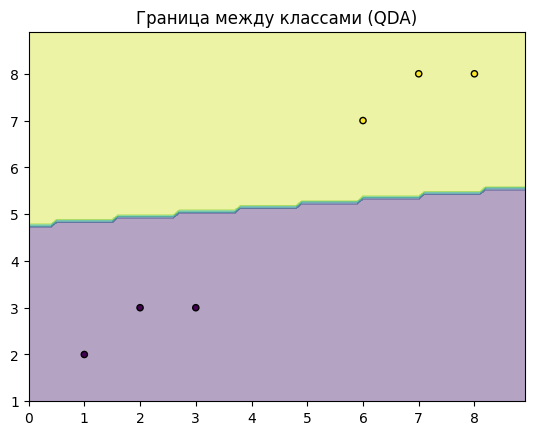

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Пример 2D-данных
X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 7],
    [7, 8],
    [8, 8]
])
y = np.array([0, 0, 0, 1, 1, 1])

# Обучаем модель
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X, y)

# Визуализация
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("Граница между классами (QDA)")
plt.show()